In [1]:
# auto reload modules when edited
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [94]:
# plt settings and interactive plot
%matplotlib ipympl
plt.style.use('default')
plt.rcParams['figure.figsize'] = [6, 4]

In [5]:
from ftnmr import *

### Hydrogens and their frequencies and ratios

In [6]:
from string import ascii_lowercase as asc
from scipy.special import binom
from itertools import product

In [6]:
gamma = 267.52218744*pow(10, 6)
B = 10.0

In [7]:
A = {
    'a':(1, 2.3),
    'b':(1, 3.3),
    'c':(3, 4.5)}

j1 = ('a', 'b', 3.200)
j2 = ('b', 'c', 3.200)
B = [j1, j2]

In [87]:
C = {a:[] for a in A}
print(C)

for k in A:
    for b in B:
        if k == b[0]: C[k].append( (b[2], A[b[1]][0]) )
        elif k == b[1]: C[k].append( (b[2], A[b[0]][0]) )

{'a': [], 'b': [], 'c': []}


{'a': [(3.2, 1)], 'b': [(3.2, 1), (3.2, 3)], 'c': [(3.2, 1)]}

In [93]:
F = {a:([], []) for a in A}
for k in A:
    for b, d in C[k]:
        F[k][0].append( np.array([n*b/2 for n in range(-d, d+1, 2)]) )
        F[k][1].append( np.array([binom(d, x)/pow(2,d) for x in range(0, d+1)]))

{'a': ([array([-1.6,  1.6])], [array([0.5, 0.5])]),
 'b': ([array([-1.6,  1.6]), array([-4.8, -1.6,  1.6,  4.8])],
  [array([0.5, 0.5]), array([0.125, 0.375, 0.375, 0.125])]),
 'c': ([array([-1.6,  1.6])], [array([0.5, 0.5])])}

In [23]:
# this combines the above two cells into one

F = {a:([], []) for a in A}

for k in A:
    for b in B:
        if k == b[0]: 
            d = A[b[1]][0]
            F[k][0].append( [n*b[2]/2 for n in range(-d, d+1, 2)] )
            F[k][1].append( [binom(d, x)/pow(2,d) for x in range(0, d+1)] )
        elif k == b[1]: 
            d = A[b[0]][0]
            F[k][0].append( [n*b[2]/2 for n in range(-d, d+1, 2)] )
            F[k][1].append( [binom(d, x)/pow(2,d) for x in range(0, d+1)] )

{'a': ([[-1.6, 1.6]], [[0.5, 0.5]]),
 'b': ([[-1.6, 1.6], [-4.800000000000001, -1.6, 1.6, 4.800000000000001]],
  [[0.5, 0.5], [0.125, 0.375, 0.375, 0.125]]),
 'c': ([[-1.6, 1.6]], [[0.5, 0.5]])}

In [7]:
from itertools import product

In [102]:
G = {a:([], []) for a in A}

for k in A:
    for i in product(*F[k][0]):
        G[k][0].append(sum(i))
        
    for i in product(*F[k][1]):
        G[k][1].append(np.prod(i))

{'a': ([-1.6, 1.6], [0.5, 0.5]),
 'b': ([-6.4,
   -3.2,
   0.0,
   3.2000000000000006,
   -3.2000000000000006,
   0.0,
   3.2,
   6.4],
  [0.0625, 0.1875, 0.1875, 0.0625, 0.0625, 0.1875, 0.1875, 0.0625]),
 'c': ([-1.6, 1.6], [0.5, 0.5])}

In [117]:
I = {k:([],[]) for k in A}

for k in A:
    for n in np.argsort(H[k][0]):
        I[k][0].append(H[k][0][n])
        I[k][1].append(H[k][1][n])

{'a': ([-1.6, 1.6], [0.5, 0.5]),
 'b': ([-6.4,
   -3.2000000000000006,
   -3.2,
   0.0,
   0.0,
   3.2,
   3.2000000000000006,
   6.4],
  [0.0625, 0.0625, 0.1875, 0.1875, 0.1875, 0.1875, 0.0625, 0.0625]),
 'c': ([-1.6, 1.6], [0.5, 0.5])}

In [102]:
K = {k:([J0[k][0]],[J1[k][0]]) for k in A}

for k in A:
    for i in range(1, len(J[k][0])):
        if np.isclose(K[k][0][-1], J[k][0][i]):
            K[k][1][-1] += J[k][1][i]
        else:
            K[k][0].append(J[k][0][i])
            K[k][1].append(J[k][1][i])

{'a': ([-1.6, 1.6], [0.5, 0.5]),
 'b': ([-6.4, -3.2000000000000006, 0.0, 3.2, 6.4],
  [0.0625, 0.25, 0.375, 0.25, 0.0625]),
 'c': ([-1.6, 1.6], [0.5, 0.5])}

### Molecule construction

In [8]:
hydrogens = {
        'a':(3, 2.3),
        'b':(4, 3.3),
        'c':(4, 4.5)}

j1 = ('a', 'b', 2.000)
j2 = ('b', 'c', 3.500)
couplings = [j1, j2]

In [9]:
from itertools import product
A = list(dict.fromkeys([k for b in couplings for k in b[:-1]]))
B = {k:[ (b[2], hydrogens[ b[ 1-b.index(k) ] ][0]) for b in couplings if k in b] for k in A}

F0 = {k:[ [n*b/2 for n in range(-d, d+1, 2)] for b, d in B[k]] for k in A}
F1 = {k:[ [binom(d, x)/pow(2,d) for x in range(0, d+1)] for b, d in B[k]] for k in A}
G0 = {k:[ sum(i) for i in product(*F0[k]) ] for k in A}
G1 = {k:[ np.prod(i) for i in product(*F1[k]) ] for k in A}
J0 = {k:[G0[k][n] for n in np.argsort(G0[k])] for k in A}
J1 = {k:[G1[k][n] for n in np.argsort(G0[k])] for k in A}

ind = lambda k: filter(lambda i: not np.isclose(J0[k][i-1], J0[k][i]), range(0, len(J0[k])))
K0 = {k:[J0[k][i] for i in ind(k)] for k in A}
K1 = {k:[J1[k][i] for i in ind(k)] for k in A}

dup = lambda k: filter(lambda i: np.isclose(J0[k][i-1], J0[k][i]), range(0, len(J0[k])))
for k in A:
    n = 0
    for i in dup(k):
        K1[k][i-1-n] += J1[k][i]
        n += 1

In [10]:
sum(K1['b'])

1.0

The representative spectrum 1H NMR obtained from serum samples of HC subjects. The following metabolites are identified: 

1, L_1; 

2, L_2; 

3, Isoleucine; 

4, Leucine; 

5, Valine; 

6, Unk_1; 

7, 3-Hydroxybutyrate; 

8, L_3; 

9, L_4; 

10, L_5; 

11, Lactate; 

12, Alanine; 

13, L_6; 

14, Acetate; 

15, L_7; 

16, L_8; 

17, NAC; 

18, Acetone; 

19, Acetoacetate; 

20, Pyruvate; 

21, Glutamine; 

22, Citrate; 

23, Unk_2; 

24, Creatine; 

25, Dimethyl sulfone; 

26, Chol+GPC+APC; 

27, Glucose; 

28, Betaine; 

29, Methanol; 

30, Glycerol; 

31, Creatinine; 

32, L_9; 

33, Tyrosine; 

34, π-Methylhistidine; 

35, Phenylalanine; 

36, Formate

In [8]:
hydrogens = {
    'a':(3, 1.100),
    'b':(2, 3.600),
    'c':(1, 3.250)}

j1 = ('a', 'b', 5.000)
couplings = [j1]
ethanol = molecule(hydrogens=hydrogens, couplings=couplings)

In [9]:
hydrogens = {
    'a':(3, 1.300),
    'b':(1, 4.100)}

j1 = ('a', 'b', 7.000)
couplings = [j1]
lactate = molecule(hydrogens=hydrogens, couplings=couplings)

In [10]:
hydrogens = {
    'a':(1, 3.900),
    'b':(9, 3.250)}

couplings = []
betaine = molecule(hydrogens=hydrogens, couplings=couplings)

In [11]:
hydrogens = {
    'a':(12, 10.0)}

couplings = []
TMS =  molecule(hydrogens=hydrogens, couplings=couplings)

In [12]:
molecules = {
    'A':(ethanol, 4.523),
    'B':(lactate, 6.782),
    'C':(betaine, 4.321),
    'D':(TMS, 1.0)}

### NMR sample with molecules in it

In [13]:
nmr_sample = sample(molecules=molecules, T2=500.0)

In [80]:
RH = 12
moles = nmr_sample.molecules
moles['A'][0].__dict__
test1 = {
    f'{x}_{y}{0.0:+}': (
        pow(10, -6)*moles[x][0].hydrogens[y][1]*gamma*B,
        moles[x][1]*moles[x][0].hydrogens[y][0]/RH)
    for x in moles for y in moles[x][0].hydrogens if y not in moles[x][0].splits}

In [81]:
test1

{'A_c+0.0': (8694.471091799998, 0.043583333333333335),
 'C_a+0.0': (10433.365310159998, 0.11008333333333332),
 'C_b+0.0': (8694.471091799998, 0.9907499999999999),
 'D_a+0.0': (0.0, 1.0)}

In [82]:
test2 = {
    f'{x}_{y}{z:+}': (
        pow(10, -6)*moles[x][0].hydrogens[y][1]*gamma*B + 2*np.pi*z,
        moles[x][1]*moles[x][0].hydrogens[y][0]*k/RH)
    for x in moles for y in moles[x][0].splits
    for z, k in zip(moles[x][0].splits[y][0], moles[x][0].splits[y][1])}
test2

### Spectrometer Class with Sample

In [65]:
spec = spectrometer(t_cut=1500)

In [66]:
spec()

In [67]:
spec.measure(sample=nmr_sample)

In [17]:
spec.calibrate()

In [21]:
%timeit np.fft.fft(spec.C[0])[:10]

246 µs ± 2.15 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [22]:
%timeit np.fft.fft(spec.C[0])

247 µs ± 820 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [18]:
spec.splits[3]

(26.752218743999993, 1.0)

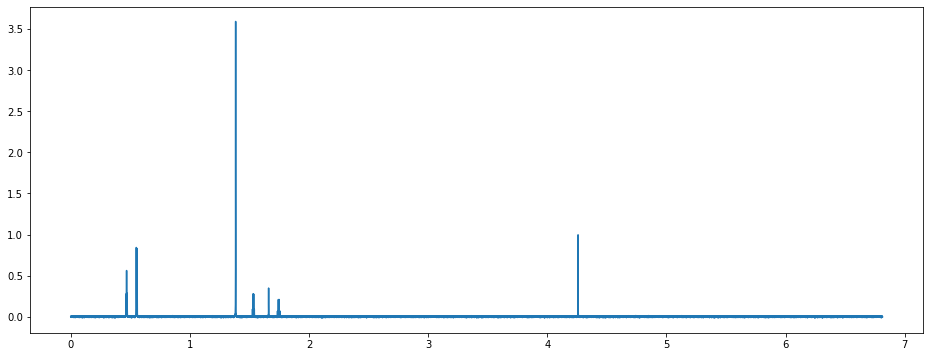

In [68]:
plt.plot(spec.f, spec.spectra.real)
plt.show()

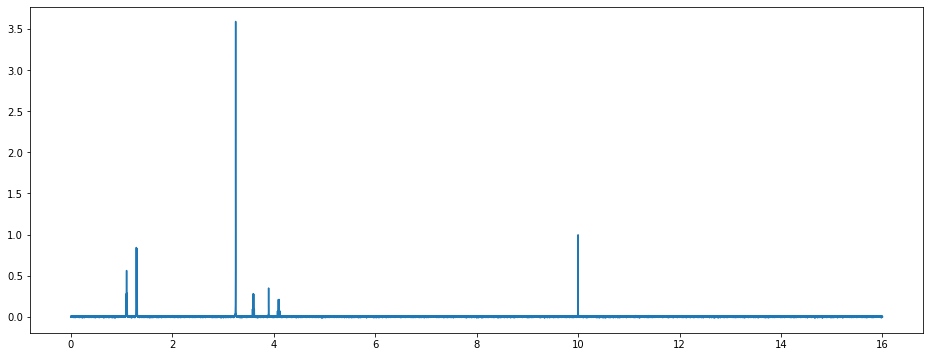

In [69]:
plt.plot(spec.shift, spec.spectra.real)
plt.show()

In [250]:
spec.shift_cutoff

16.0

In [22]:
spec.df

0.00010394892216267714

In [261]:
spec.__dict__

{'B': 10.0,
 'timeunit': 'msec',
 'shift_maximum': 128.0,
 'p_l': 3,
 'shift_cutoff': 16.0,
 'f_unit': 'kHz',
 'ep': -3,
 'w_l': 2675221.8743999996,
 'f_s': 54.49917250282567,
 'dt': 0.01834890245256755,
 'ns': 131072,
 'p': 19,
 't': array([0.00000000e+00, 1.83489025e-02, 3.66978049e-02, ...,
        2.40497230e+03, 2.40499064e+03, 2.40500899e+03]),
 'df': 0.00010394892216267714,
 'nf': 65536,
 'f': array([0.00000000e+00, 1.03948922e-04, 2.07897844e-04, ...,
        6.81208472e+00, 6.81218867e+00, 6.81229261e+00]),
 'shift': array([0.00000000e+00, 2.44140625e-04, 4.88281250e-04, ...,
        1.59992676e+01, 1.59995117e+01, 1.59997559e+01]),
 'hr': 0.08333333333333333,
 'splits': [(8.694471091799999, 0.3769166666666666),
  (10.433365310159997, 0.3600833333333333),
  (8.694471091799999, 3.2407499999999994),
  (26.752218743999993, 1.0),
  (2.911328135304102, 0.2826875),
  (2.9427440618399996, 0.565375),
  (2.9741599883758973, 0.2826875),
  (9.58367485803615, 0.09422916666666666),
  (9.61

In [72]:
repr(spec)

'Spectrometer class that measures a sample solution with organic molecules in it'

In [95]:
plt.plot(spec.shift, spec.spectra.real, linewidth=0.5)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [98]:
plt.plot(spec.shift, spec.spectra.real, linewidth=0.5)
plt.show()

### NMR artifact

In [107]:
# plt settings and interactive plot
%matplotlib ipympl
plt.style.use('default')
plt.rcParams['figure.figsize'] = [6, 4]

In [147]:
from scipy import interpolate

In [148]:
x = np.arange(0, 2*np.pi+np.pi/4, 2*np.pi/8)
y = np.sin(x)

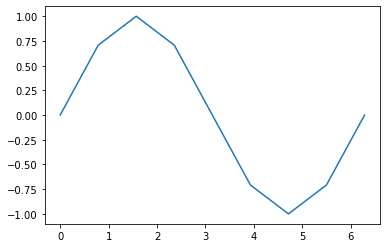

In [156]:
plt.plot(x, y)

In [166]:
tck = interpolate.splrep(x, y, s=0)
xnew = np.arange(0, 2*np.pi, np.pi/50)
ynew = interpolate.splev(xnew, tck, der=0)

In [180]:
tck[0]

array([0.        , 0.        , 0.        , 0.        , 1.57079633,
       2.35619449, 3.14159265, 3.92699082, 4.71238898, 6.28318531,
       6.28318531, 6.28318531, 6.28318531])

In [179]:
tck[1]

array([ 3.44265545e-18,  5.54608516e-01,  1.21921009e+00,  7.83113675e-01,
        2.45205789e-16, -7.83113675e-01, -1.21921009e+00, -5.54608516e-01,
       -2.44929360e-16,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00])

In [174]:
tck[2]

3

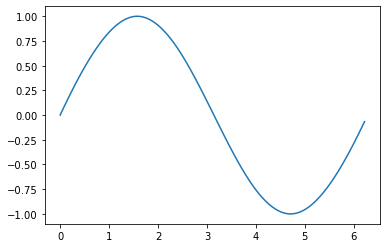

In [167]:
plt.plot(xnew, ynew)

In [157]:
interpolate.splev?

Signature: interpolate.splev(x, tck, der=0, ext=0)
Docstring:
Evaluate a B-spline or its derivatives.

Given the knots and coefficients of a B-spline representation, evaluate
the value of the smoothing polynomial and its derivatives. This is a
wrapper around the FORTRAN routines splev and splder of FITPACK.

Parameters
----------
x : array_like
    An array of points at which to return the value of the smoothed
    spline or its derivatives. If `tck` was returned from `splprep`,
    then the parameter values, u should be given.
tck : 3-tuple or a BSpline object
    If a tuple, then it should be a sequence of length 3 returned by
    `splrep` or `splprep` containing the knots, coefficients, and degree
    of the spline. (Also see Notes.)
der : int, optional
    The order of derivative of the spline to compute (must be less than
    or equal to k, the degree of the spline).
ext : int, optional
    Controls the value returned for elements of ``x`` not in the
    interval defined by the kn